import Pandas,Numpy,Seaborn,Matplotlib and warning Library

In [97]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import SCV Data as Pandas DataFrame

In [98]:
df = pd.read_csv("data//stud.csv")


Show Top 5 Rows


In [99]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset [rows and Columns]

In [100]:
df.shape

(1000, 8)

3.1 check Missing values

In [101]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Check duplicate elements 

In [102]:
df.duplicated().sum()

0

check info


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [104]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

check statistics of data set 

In [105]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


3.7 Exploring Data

In [106]:
print('categories in gender  variable   ',end=' ')
print(df['gender'].unique())

print('categories in gender variable   ',end=' ')
print(df['race_ethnicity'].unique())

categories in gender  variable    ['female' 'male']
categories in gender variable    ['group B' 'group C' 'group A' 'group D' 'group E']


In [107]:
# define numerical and catergorical features 
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('we have {} numerical features : {}'.format(len(categorical_features),categorical_features))


we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding column for Total score and Average 

In [108]:

df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [109]:
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()
print('number of students scrored full marks in math {}'.format(math_full))
print('number of students scrored full marks in reading {}'.format(reading_full))
print('number of students scrored full marks in writing {}'.format(writing_full))

number of students scrored full marks in math 7
number of students scrored full marks in reading 17
number of students scrored full marks in writing 14


In [110]:
reading_less20 = df[df['reading_score']<= 20]['average'].count()
writing_less20 = df[df['writing_score']<= 20]['average'].count()
math_less20 = df[df['math_score']<= 20]['average'].count()
print('number of students scrored less 20 marks in math {}'.format(math_less20))
print('number of students scrored less  20 marks in reading {}'.format(reading_less20))
print('number of students scrored less  20 marks in writing {}'.format(writing_less20))

number of students scrored less 20 marks in math 4
number of students scrored less  20 marks in reading 1
number of students scrored less  20 marks in writing 3


Histogram & KDE

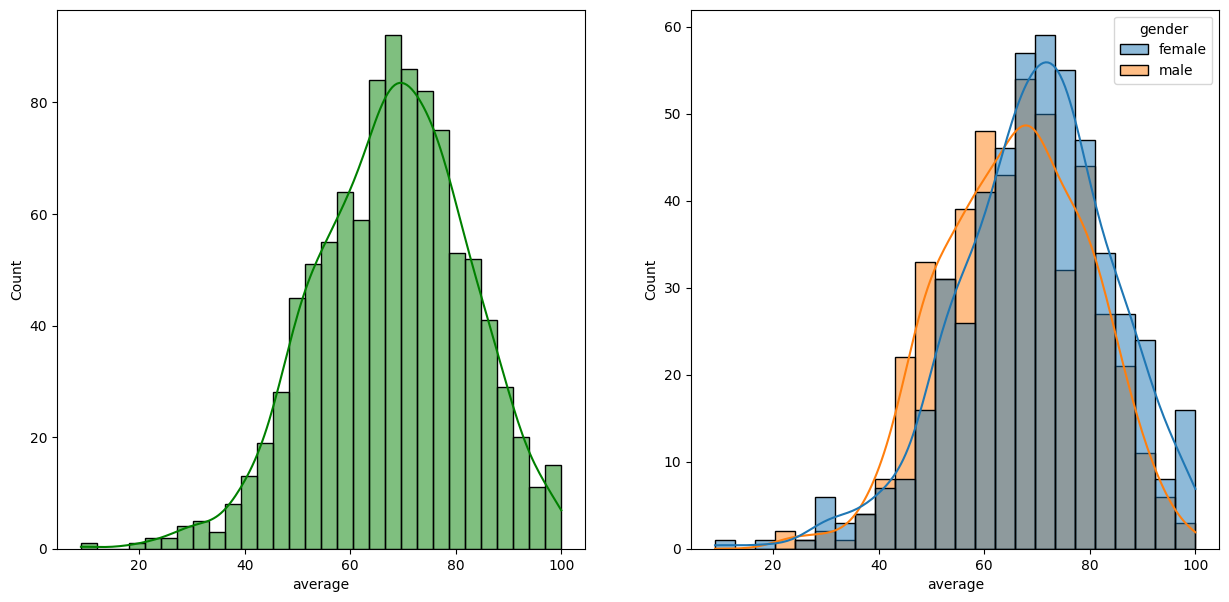

In [111]:
fig, axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,color='g',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average',hue='gender',kde=True)
plt.show()

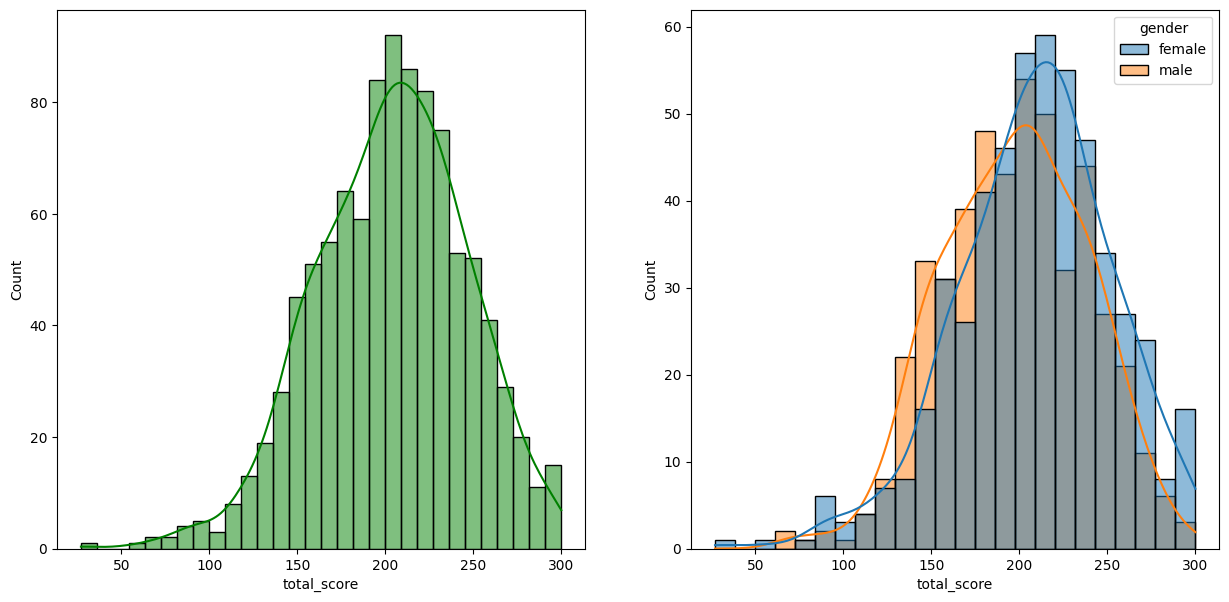

In [112]:
fig, axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,color='g',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='total_score',hue='gender',kde=True)
plt.show()

Female Students tend to perform well then male students 

<Axes: xlabel='average', ylabel='Count'>

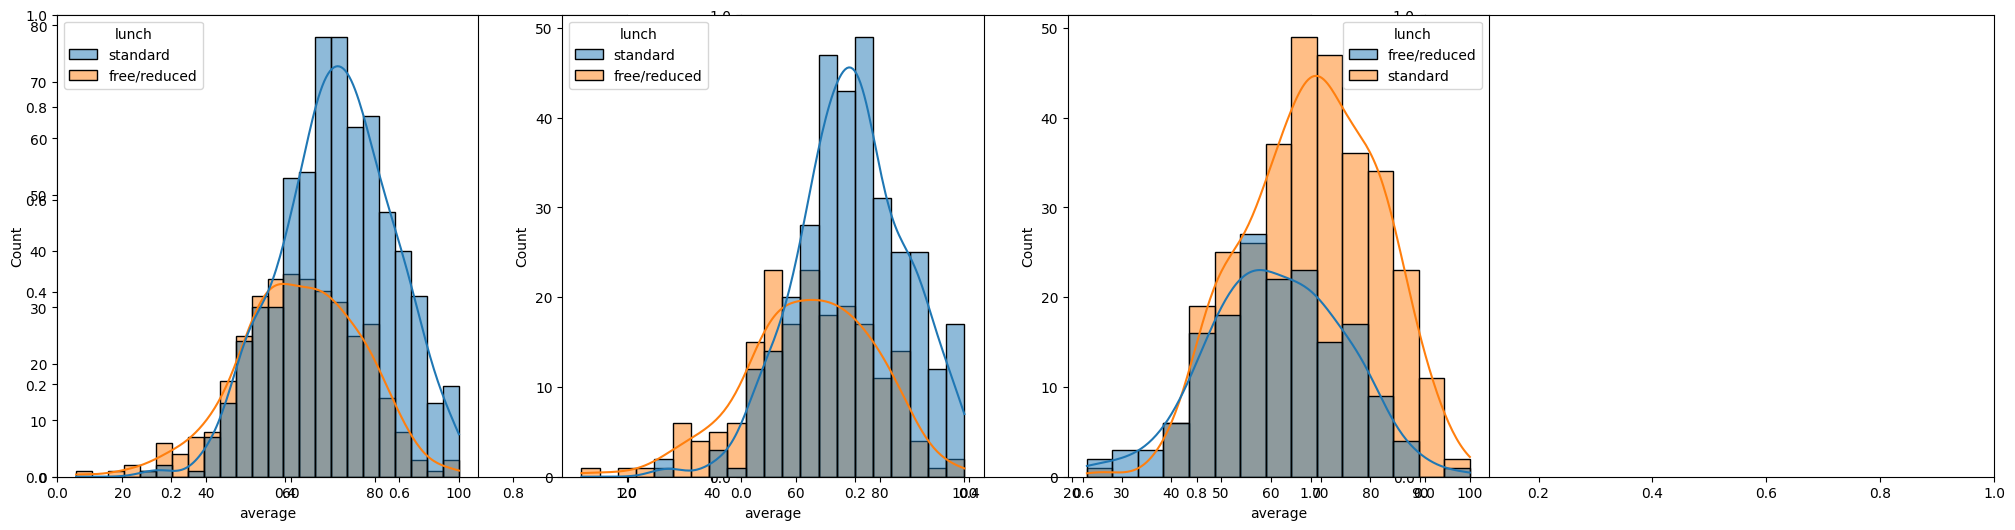

In [113]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True)

Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or female.


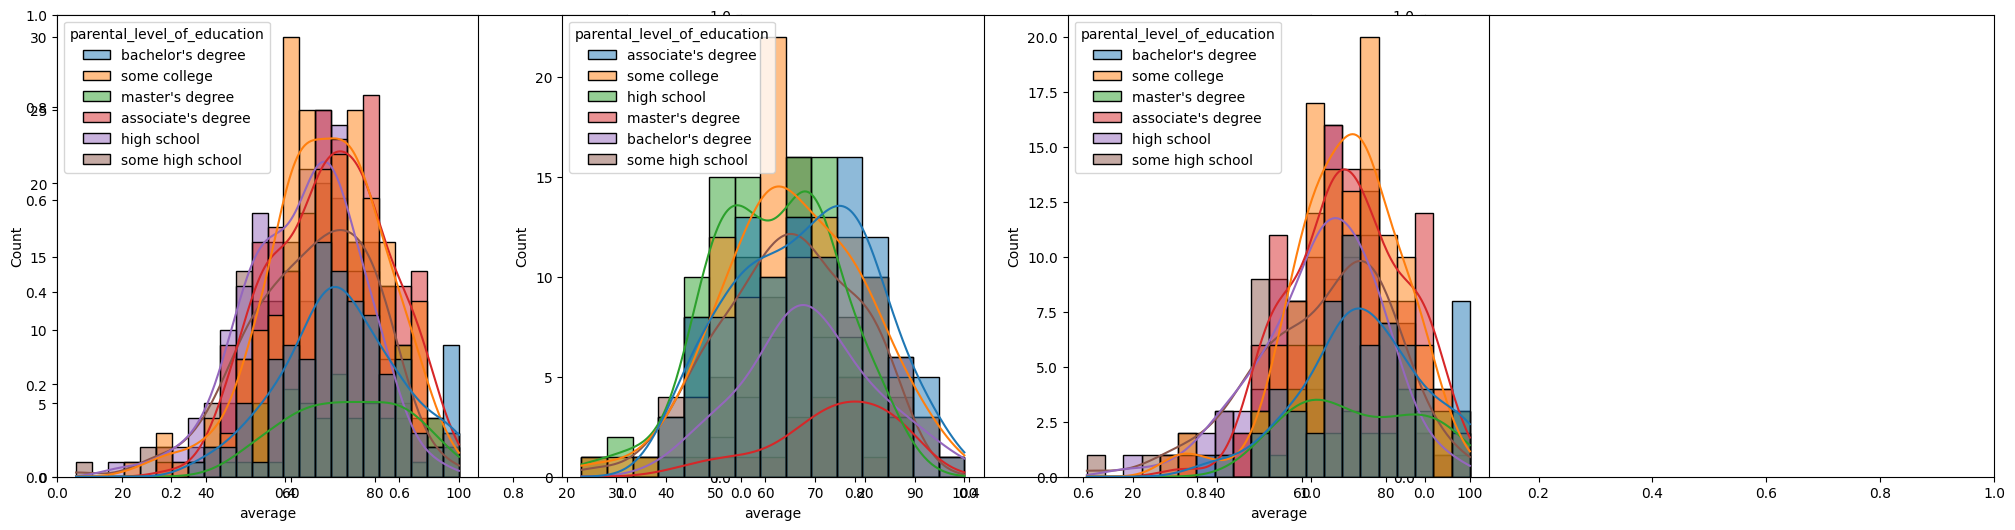

In [114]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',hue='parental_level_of_education',kde=True)
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',hue='parental_level_of_education',kde=True)
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',hue='parental_level_of_education',kde=True)
plt.show()

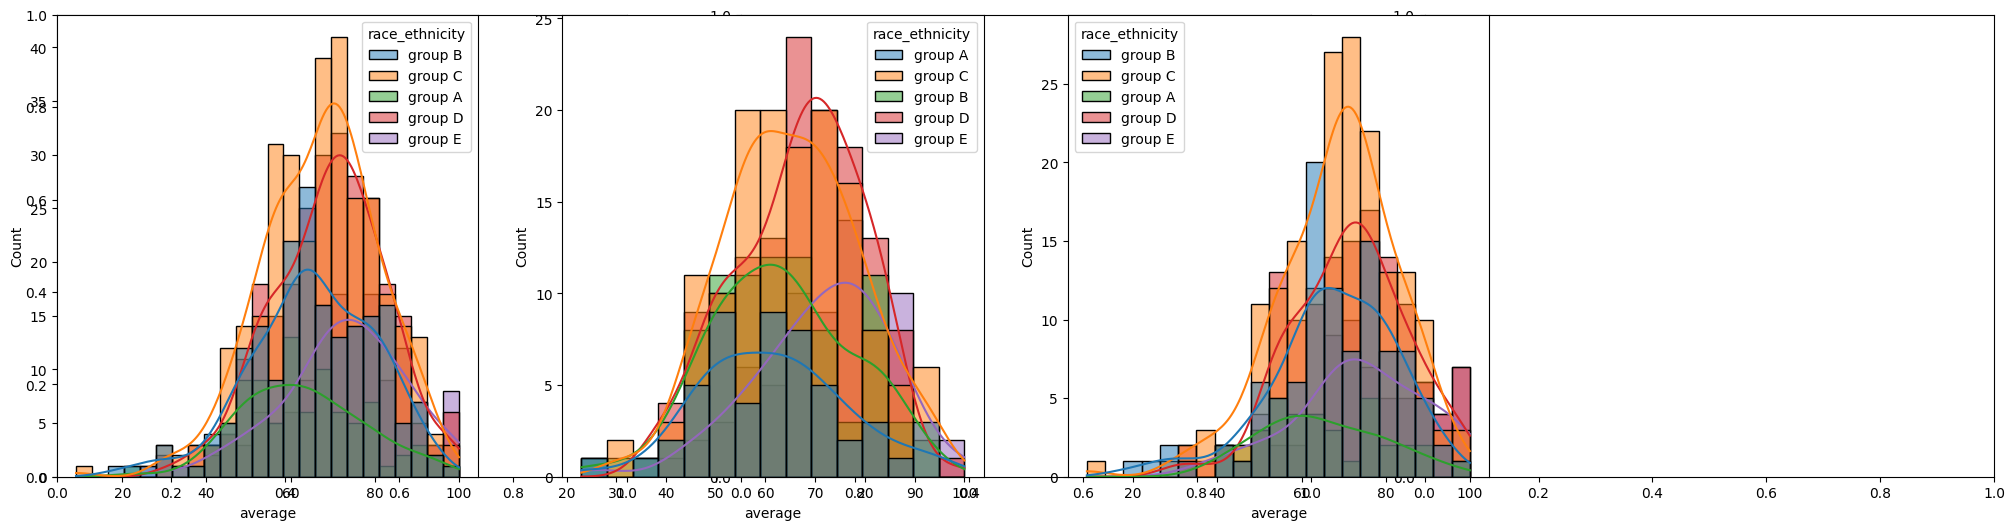

In [115]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',hue='race_ethnicity',kde=True)
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',hue='race_ethnicity',kde=True)
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',hue='race_ethnicity',kde=True)
plt.show()

maximumum scoer of students in all three subjects


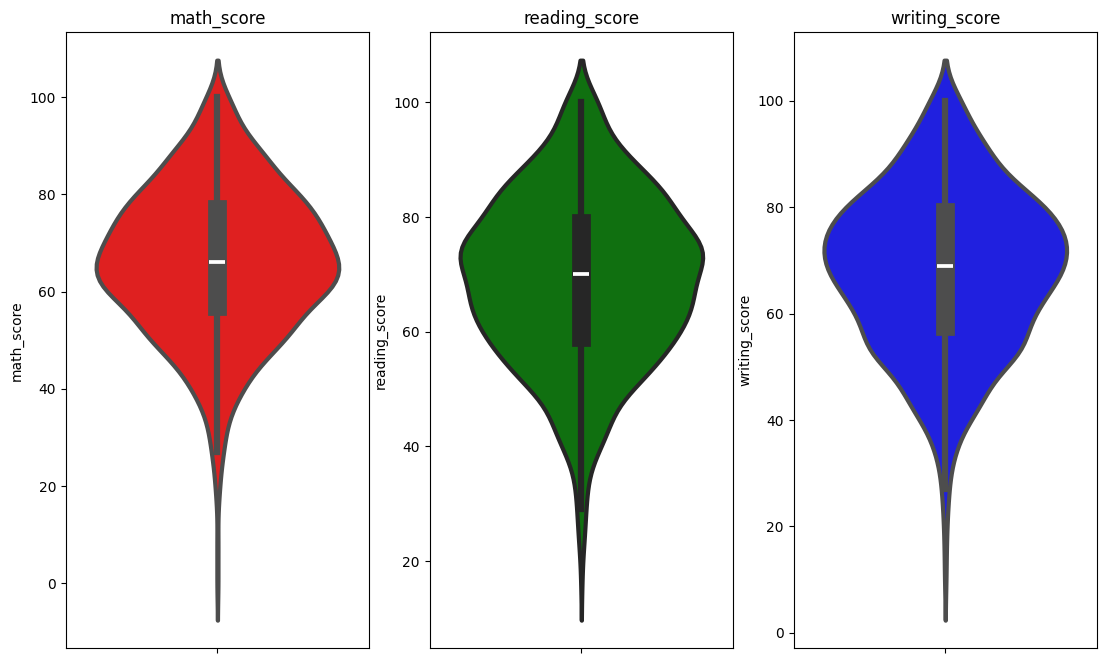

In [116]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('math_score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading_score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing_score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Multivariate analysis using pieplot

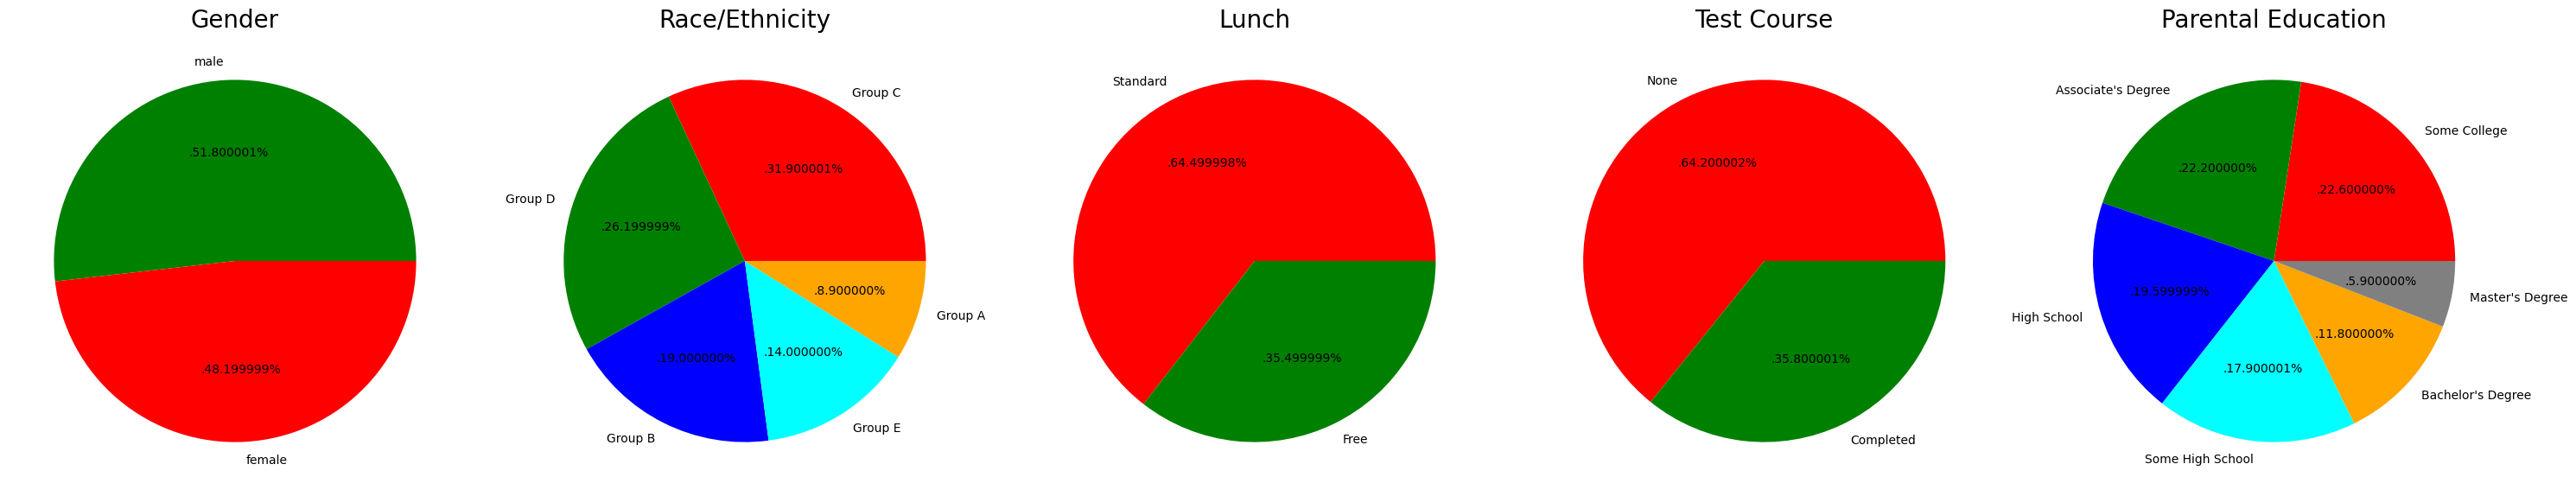

In [117]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
lables = 'male','female'
color = ['green','red']

plt.pie(size,colors=color, labels=lables, autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Feature Wise Visulization

UNIVARIATE ANALYSIS

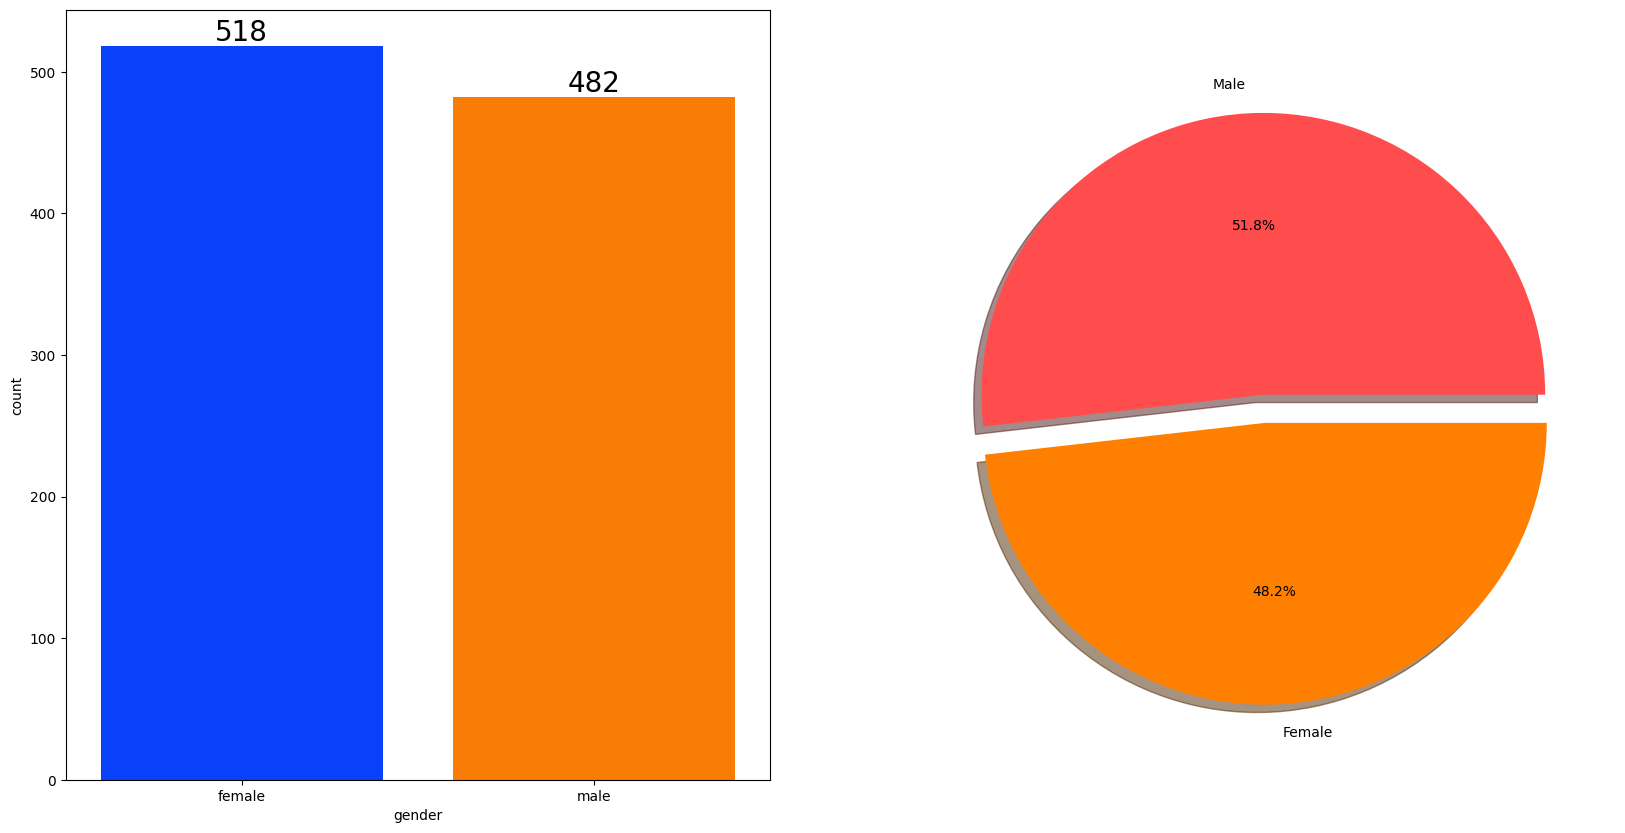

In [118]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [121]:

gender_group = df['gender'].mean
gender_group

<bound method Series.mean of 0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object>

In [122]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

TypeError: 'method' object is not subscriptable

<Figure size 1000x800 with 0 Axes>